#### Module Importation

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%reload_ext autoreload
%autoreload 
from HelperFunctions import missingValuesInfo, minibatch

import pandas_profiling
import missingno as msno 

#### Import Dataframe

In [2]:
df=pd.read_csv('lean_df_4.csv',index_col='id')

/home/auscheng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (34,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### DataFrame too big to look at missingness completely. Random Sample from the entire dataframe and see the general trend. 

In [3]:
df_0=df.sample(frac=0.01,random_state=0,axis=0)
df_1=df.sample(frac=0.01,random_state=1,axis=0)
df_2=df.sample(frac=0.01,random_state=2,axis=0)
df_3=df.sample(frac=0.01,random_state=3,axis=0)

In [4]:
missingValuesInfo(df_0)

Total  Percent
verification_status_joint    16171    94.62
annual_inc_joint             16112    94.27
dti_joint                    16112    94.27
mths_since_last_record       14302    83.68
mths_since_last_major_derog  12555    73.46
next_pymnt_d                  9835    57.54
mths_since_last_delinq        8637    50.54
il_util                       8267    48.37
mths_since_rcnt_il            7090    41.48
all_util                      6739    39.43
open_il_12m                   6738    39.42
max_bal_bc                    6738    39.42
inq_fi                        6738    39.42
total_cu_tl                   6738    39.42
inq_last_12m                  6738    39.42
open_act_il                   6738    39.42
open_rv_24m                   6738    39.42
mths_since_recent_inq         2212    12.94
emp_title                     1308     7.65
emp_length                    1184     6.93
num_tl_120dpd_2m              1027     6.01
mo_sin_old_il_acct             925     5.41
mths_since_recent_bc           569     3.33
active_card_frac               432     2.53
card_frac                      386     2.26
mort_frac                      386     2.26
install_frac                   386     2.26
good_acc_frac                  386     2.26
tot_coll_amt                   386     2.26
tot_hi_cred_lim                386     2.26
active_revol_frac              386     2.26
open_revol_frac                386     2.26
revol_frac                     386     2.26
total_il_high_credit_limit     386     2.26
pct_tl_nvr_dlq                 386     2.26
num_bc_sats                    386     2.26
total_rev_hi_lim               386     2.26
num_tl_op_past_12m             386     2.26
mo_sin_old_rev_tl_op           386     2.26
num_tl_90g_dpd_24m             386     2.26
mo_sin_rcnt_rev_tl_op          386     2.26
mo_sin_rcnt_tl                 386     2.26
num_accts_ever_120_pd          386     2.26
last_pymnt_d                    19     0.11
dti                             18     0.11
revol_util                      15     0.09
pub_rec_bankruptcies            10     0.06
collections_12_mths_ex_med       1     0.01
tax_liens                        1     0.01
chargeoff_within_12_mths         1     0.01

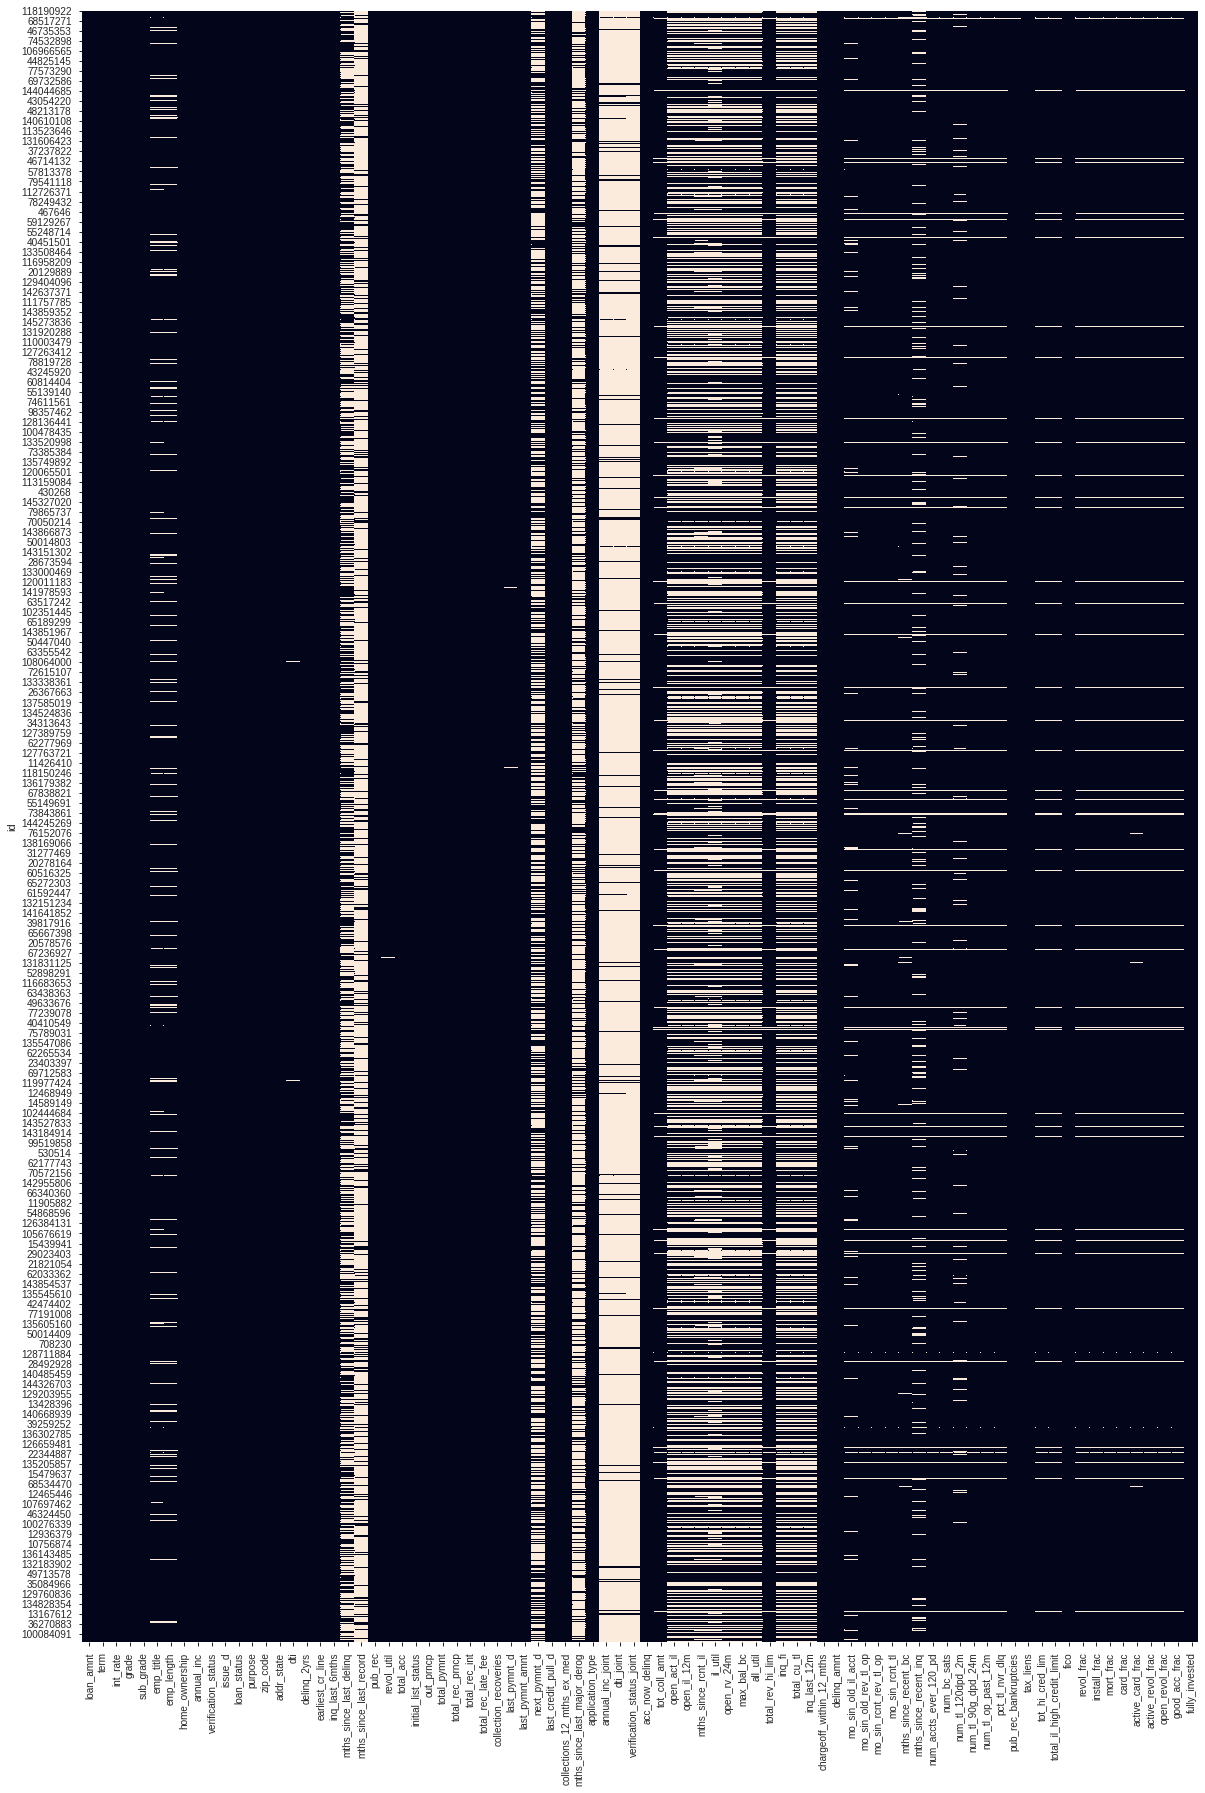

In [5]:
plt.figure(figsize=(20,30))
sns.heatmap(df_0.isnull(), cbar=False)

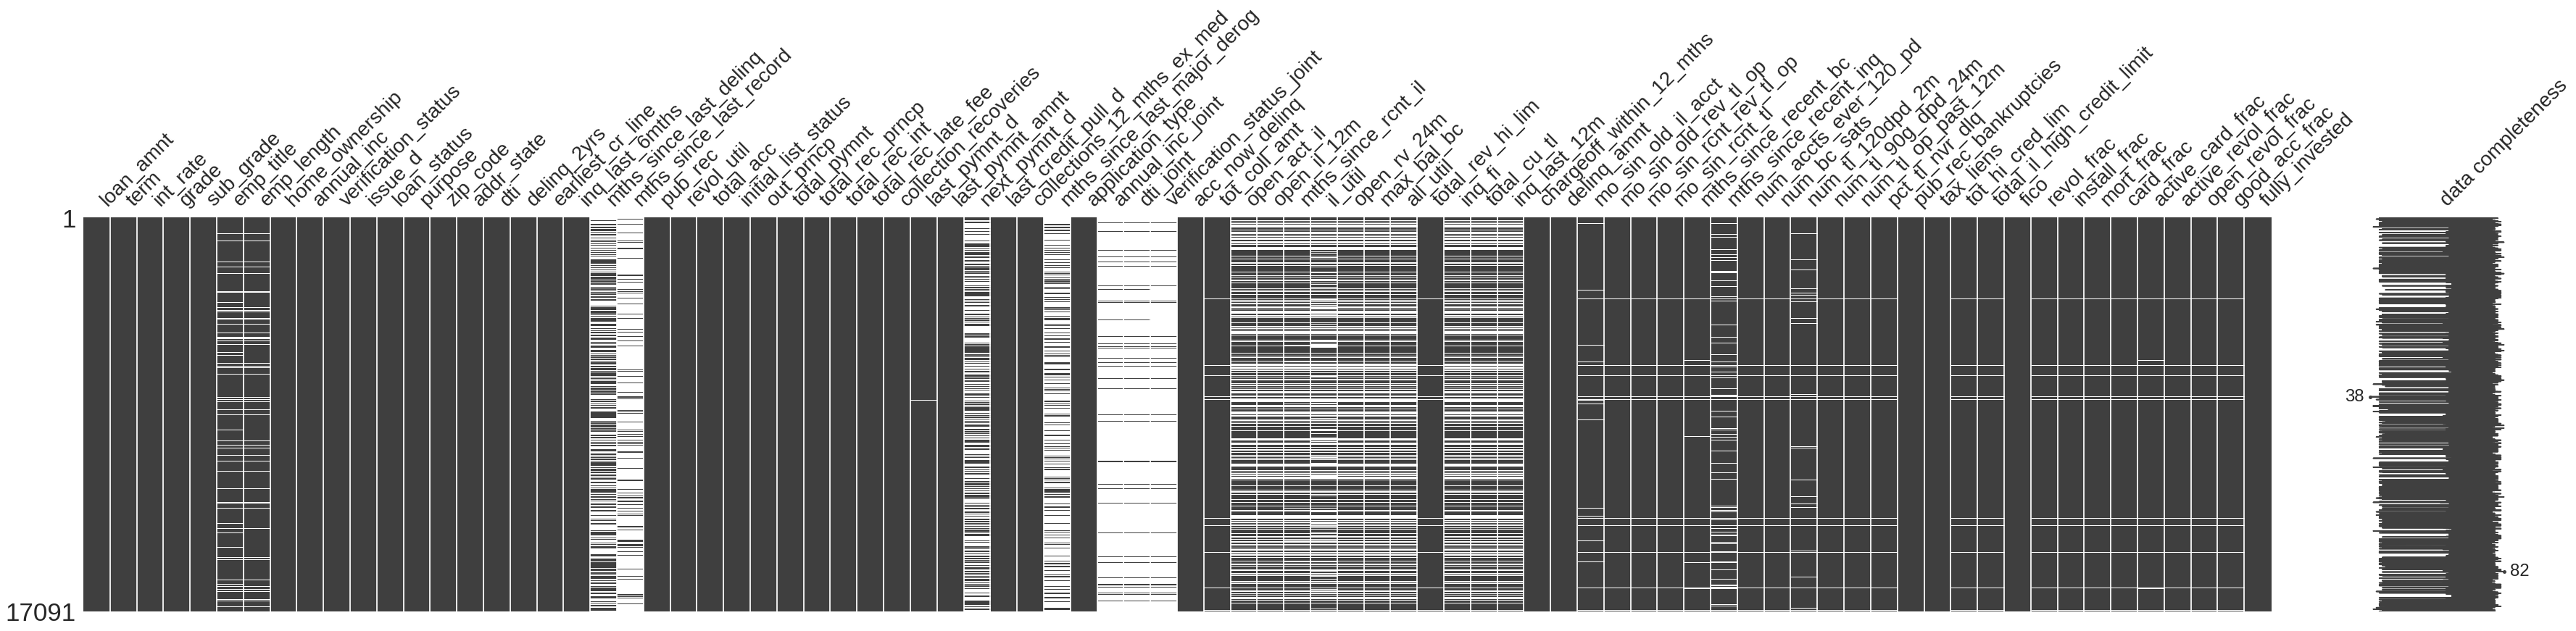

In [6]:
msno.matrix(df_0,figsize=(60, 10),fontsize=28,labels=True)

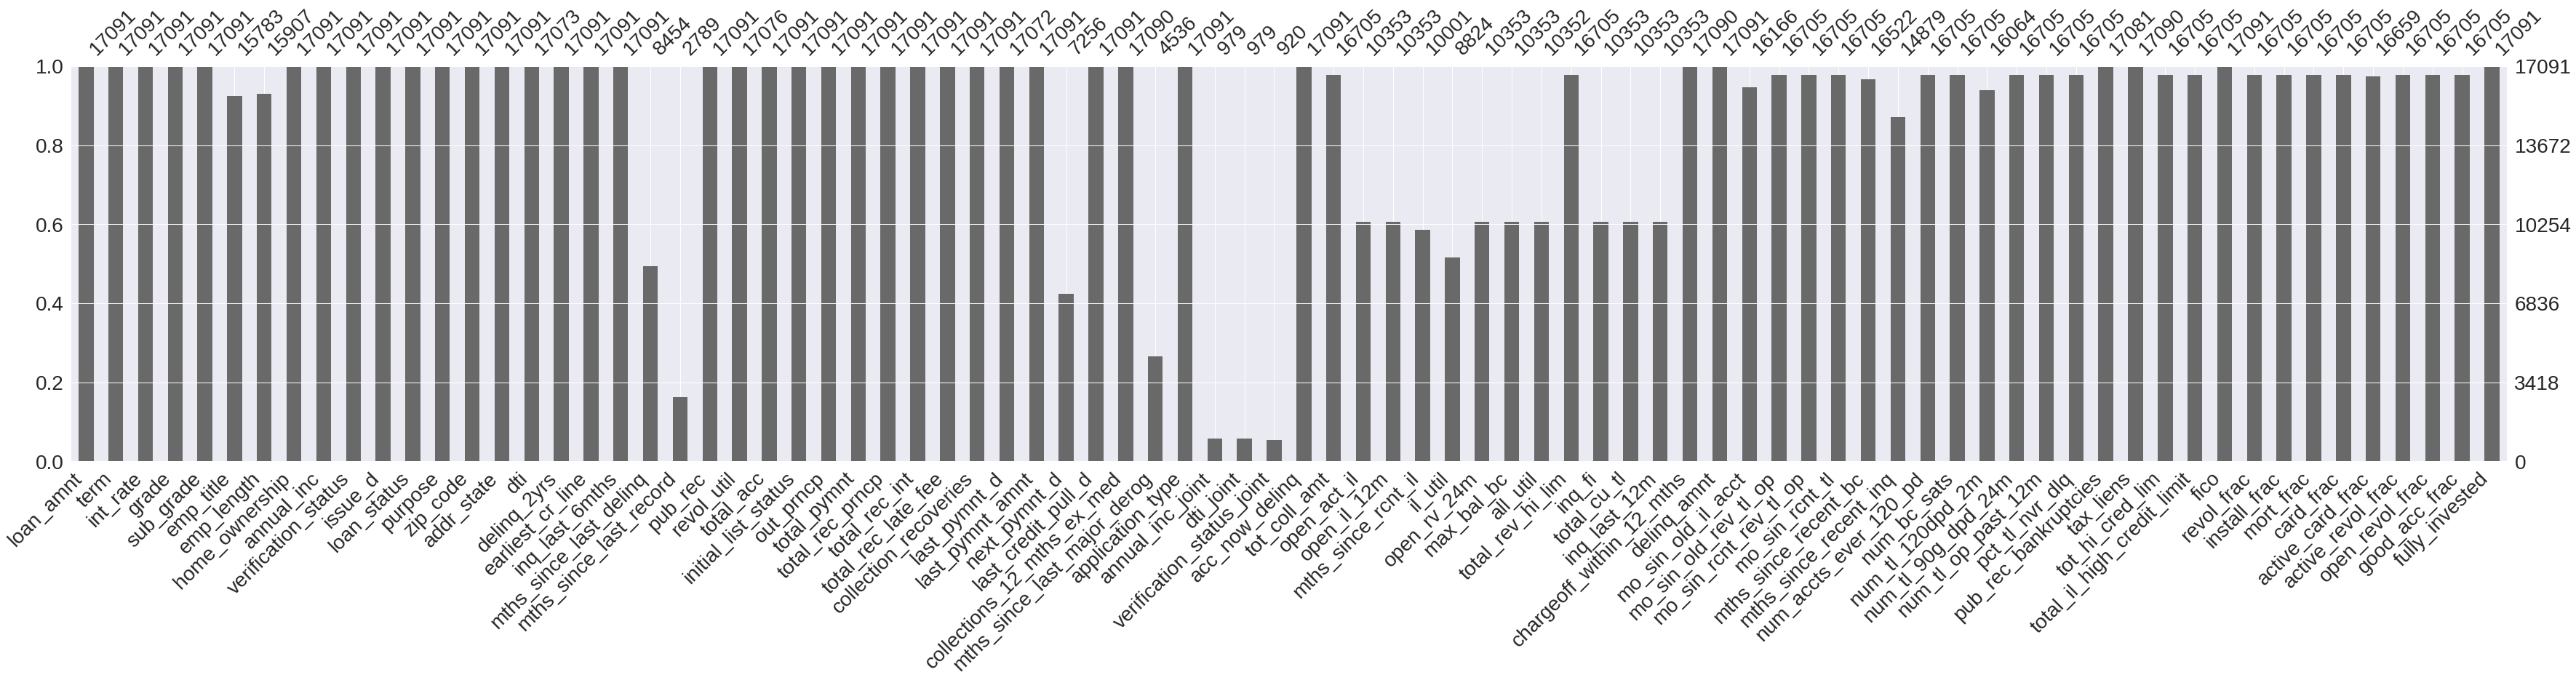

In [7]:
msno.bar(df_0,figsize=(60, 10),fontsize=28,labels=True)

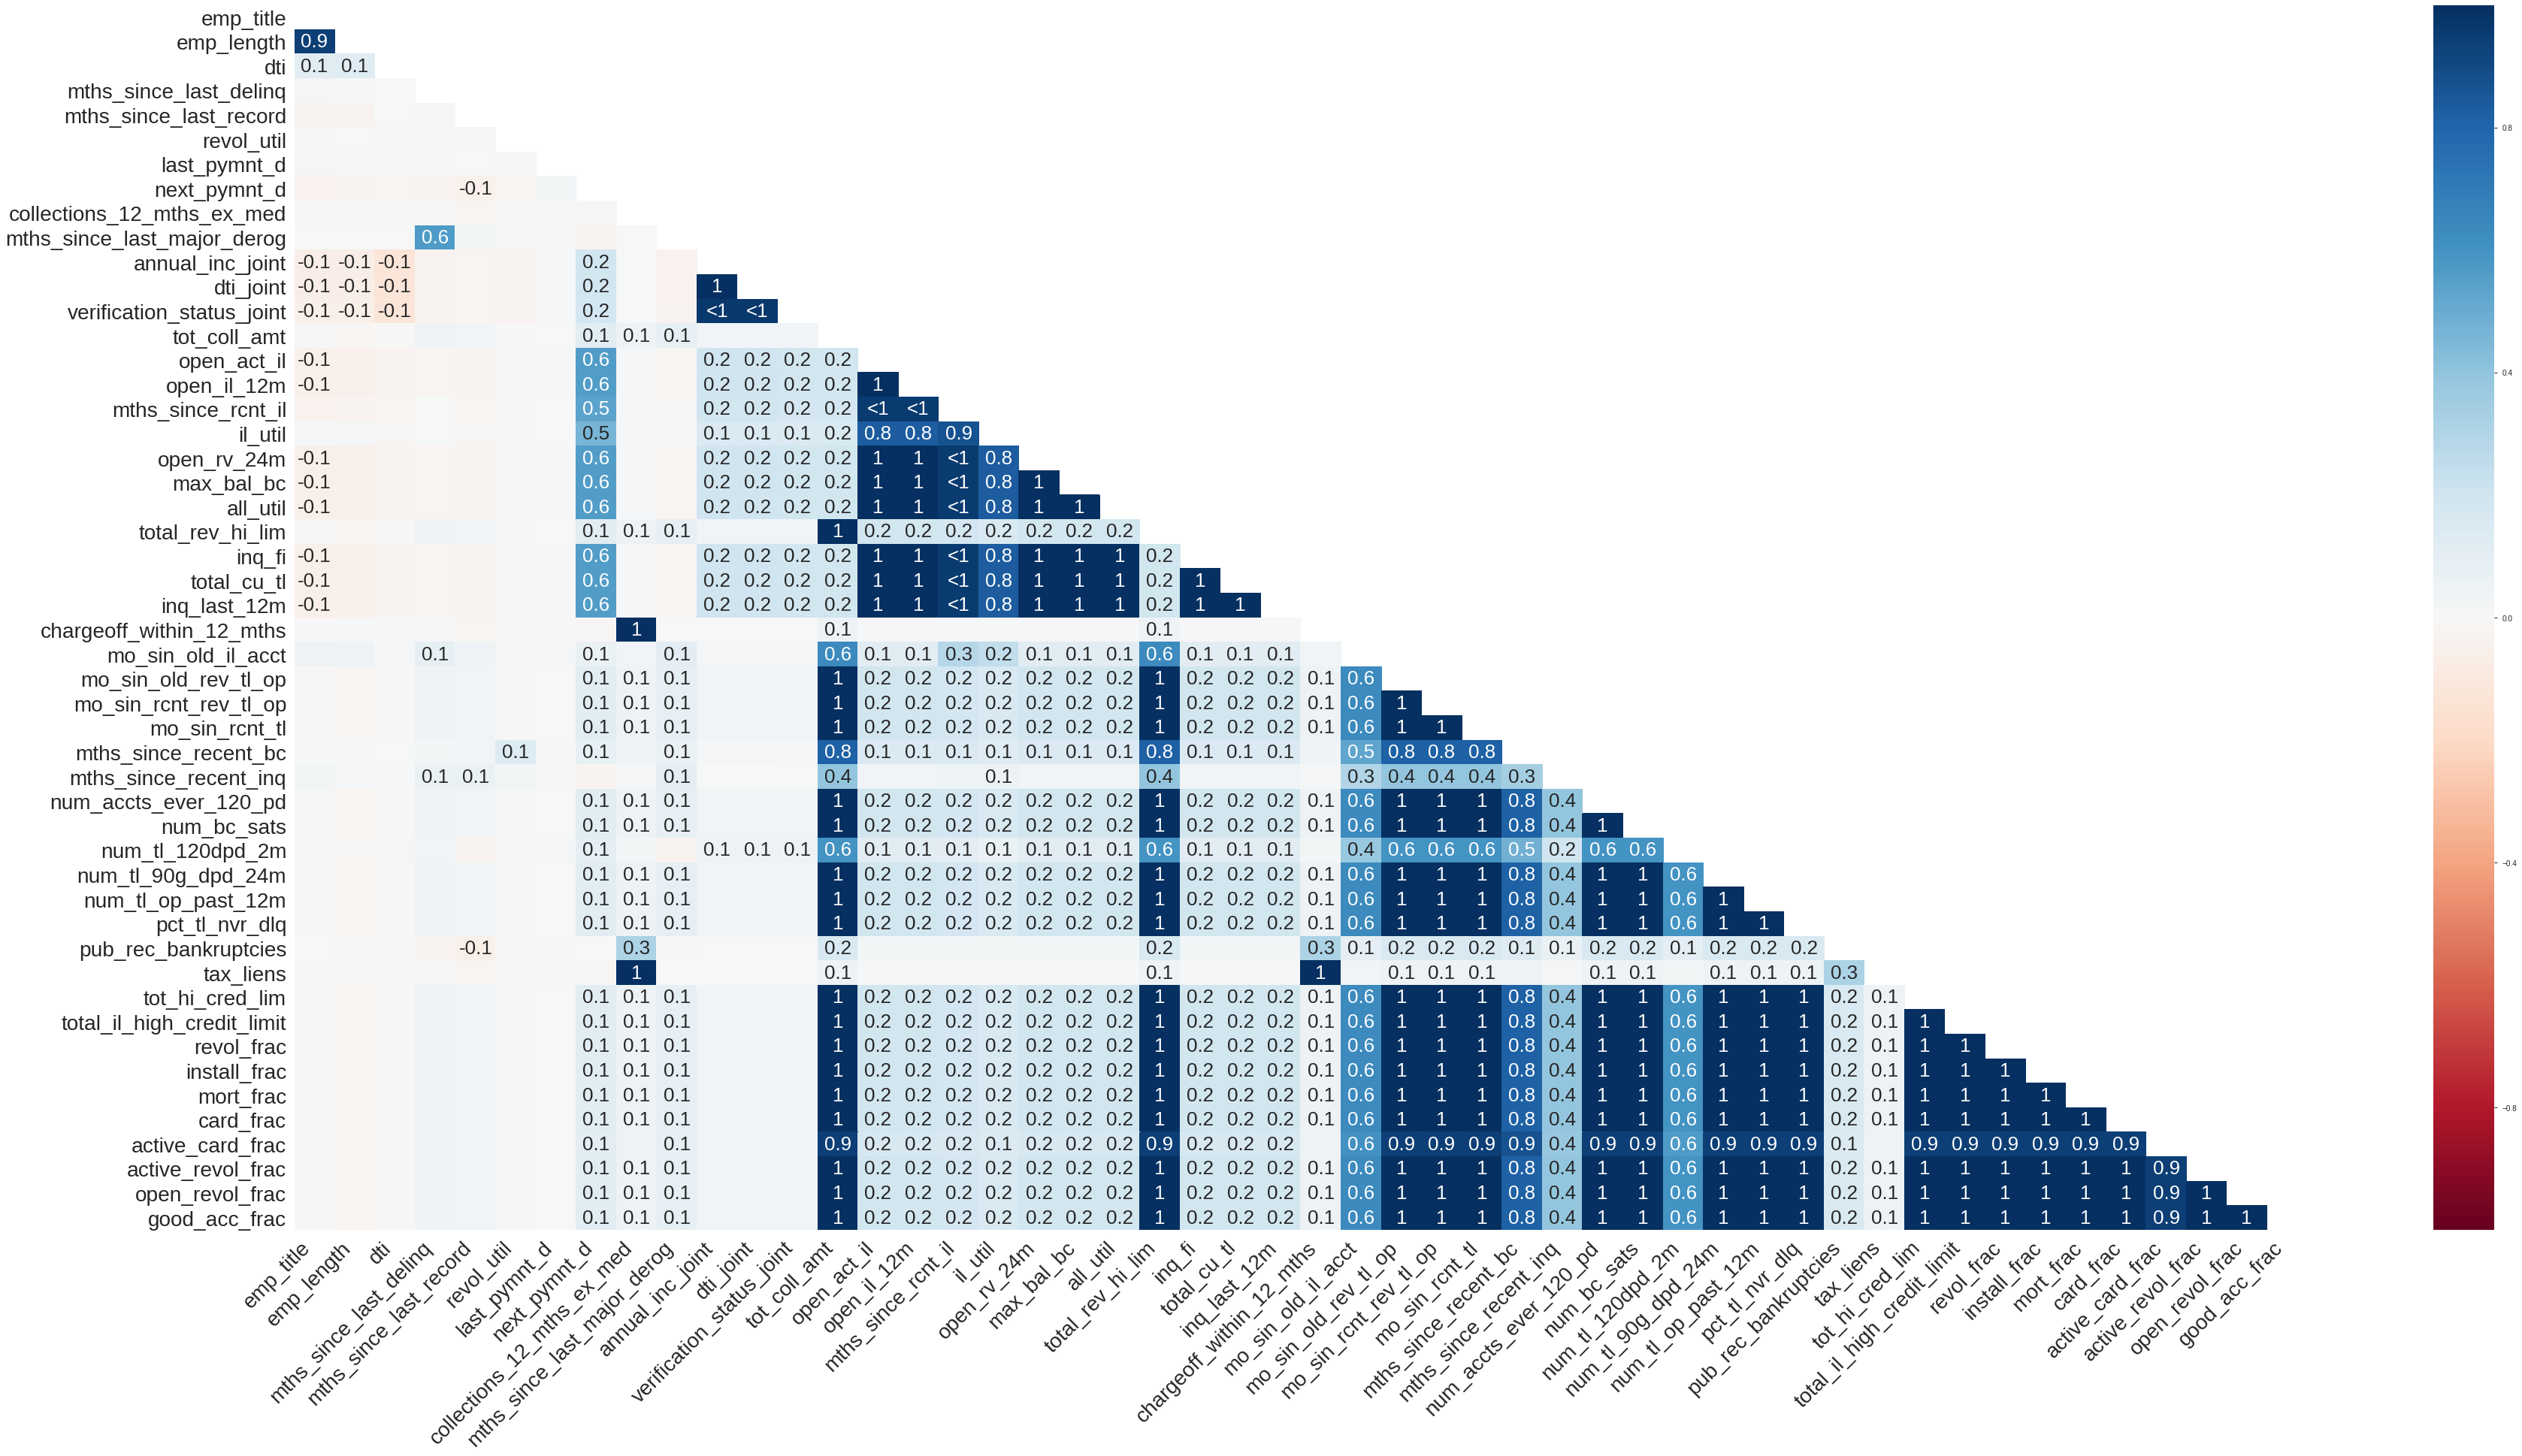

In [8]:
msno.heatmap(df_0,figsize=(60, 30),fontsize=28,labels=True)
# A value near -1 means if one variable appears then the other variable is very likely to be missing.
# A value near 0 means there is no dependence between the occurrence of missing values of two variables.
# A value near 1 means if one variable appears then the other variable is very likely to be present.

#### Looking at data in years

In [9]:
df.issue_d=pd.to_datetime(df.issue_d)
time_df=df.set_index('issue_d')
resampled_time_df=time_df.resample('M').count()

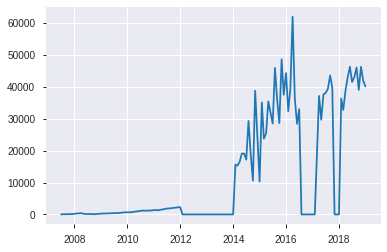

In [10]:
plt.plot(resampled_time_df.index,resampled_time_df.loan_amnt)

In [21]:
mybatch=minibatch(df)
df_2007=mybatch.takeout('2007','2008')
df_2008=mybatch.takeout('2008','2009')
df_2009=mybatch.takeout('2009','2010')
df_2010=mybatch.takeout('2010','2011')
df_2011=mybatch.takeout('2011','2012')
df_2012=mybatch.takeout('2012','2013')
df_2013=mybatch.takeout('2013','2014')
df_2014=mybatch.takeout('2014','2015')
df_2015=mybatch.takeout('2015','2016')
df_2016=mybatch.takeout('2016','2017')
df_2017=mybatch.takeout('2017','2018')
df_2018=mybatch.takeout('2018','2019')

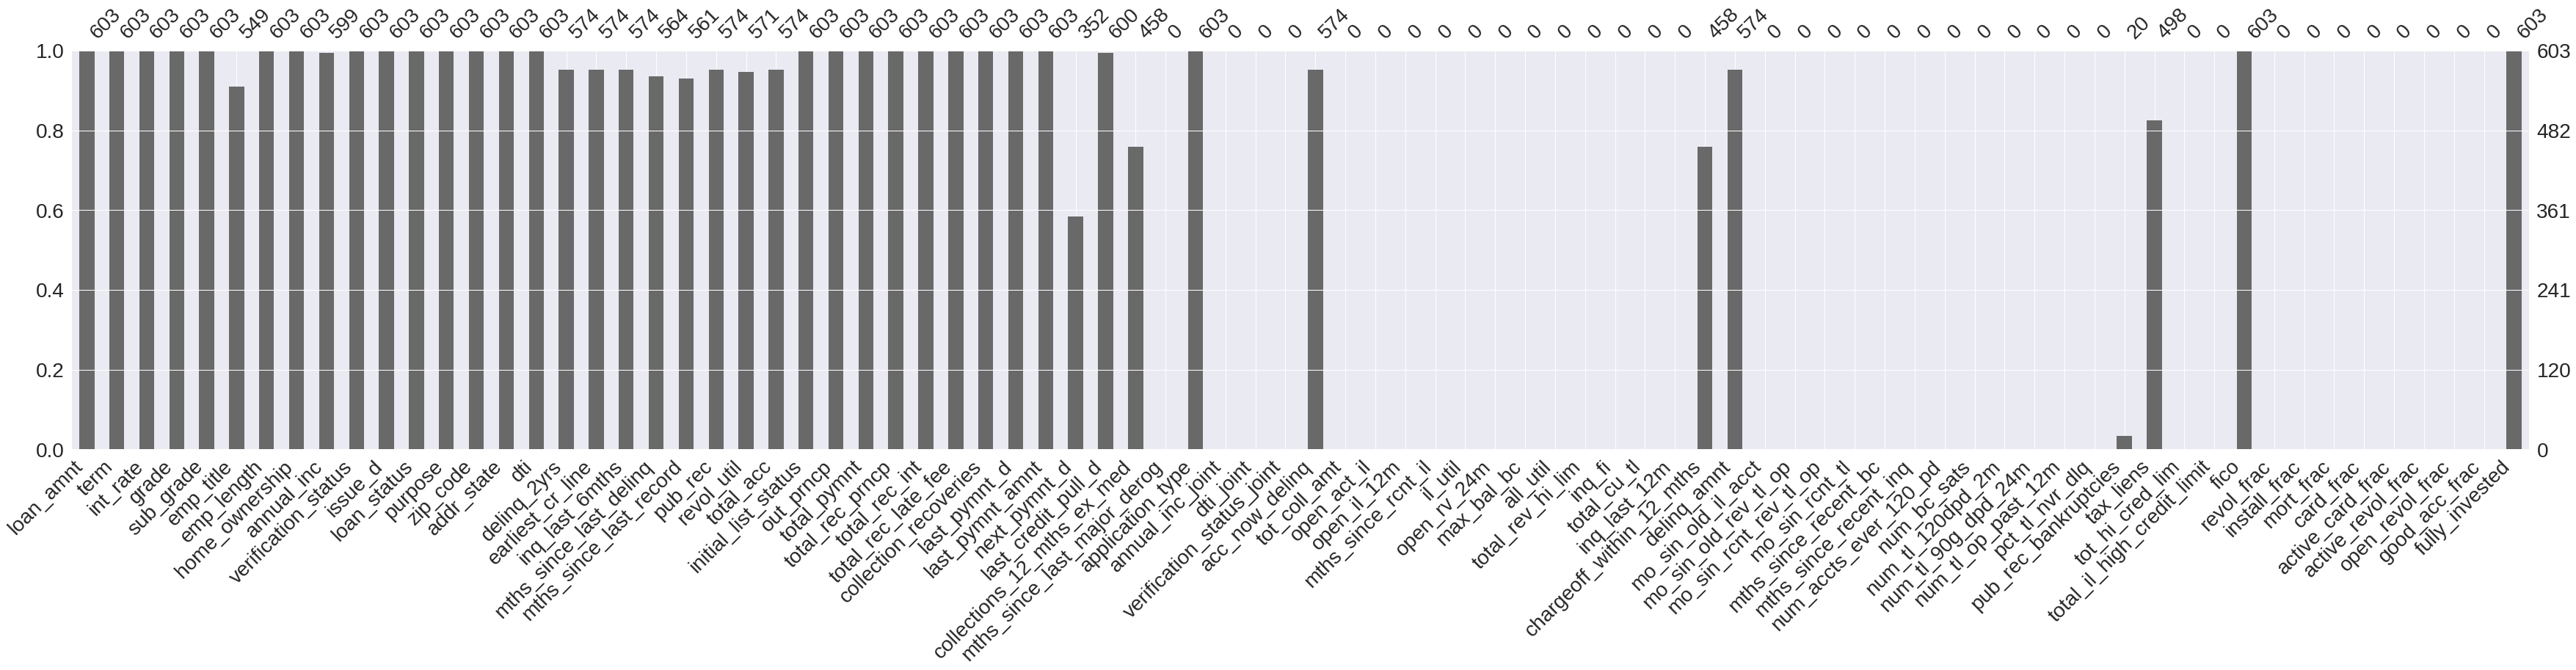

In [12]:
msno.bar(df_2007,figsize=(60, 10),fontsize=28,labels=True)

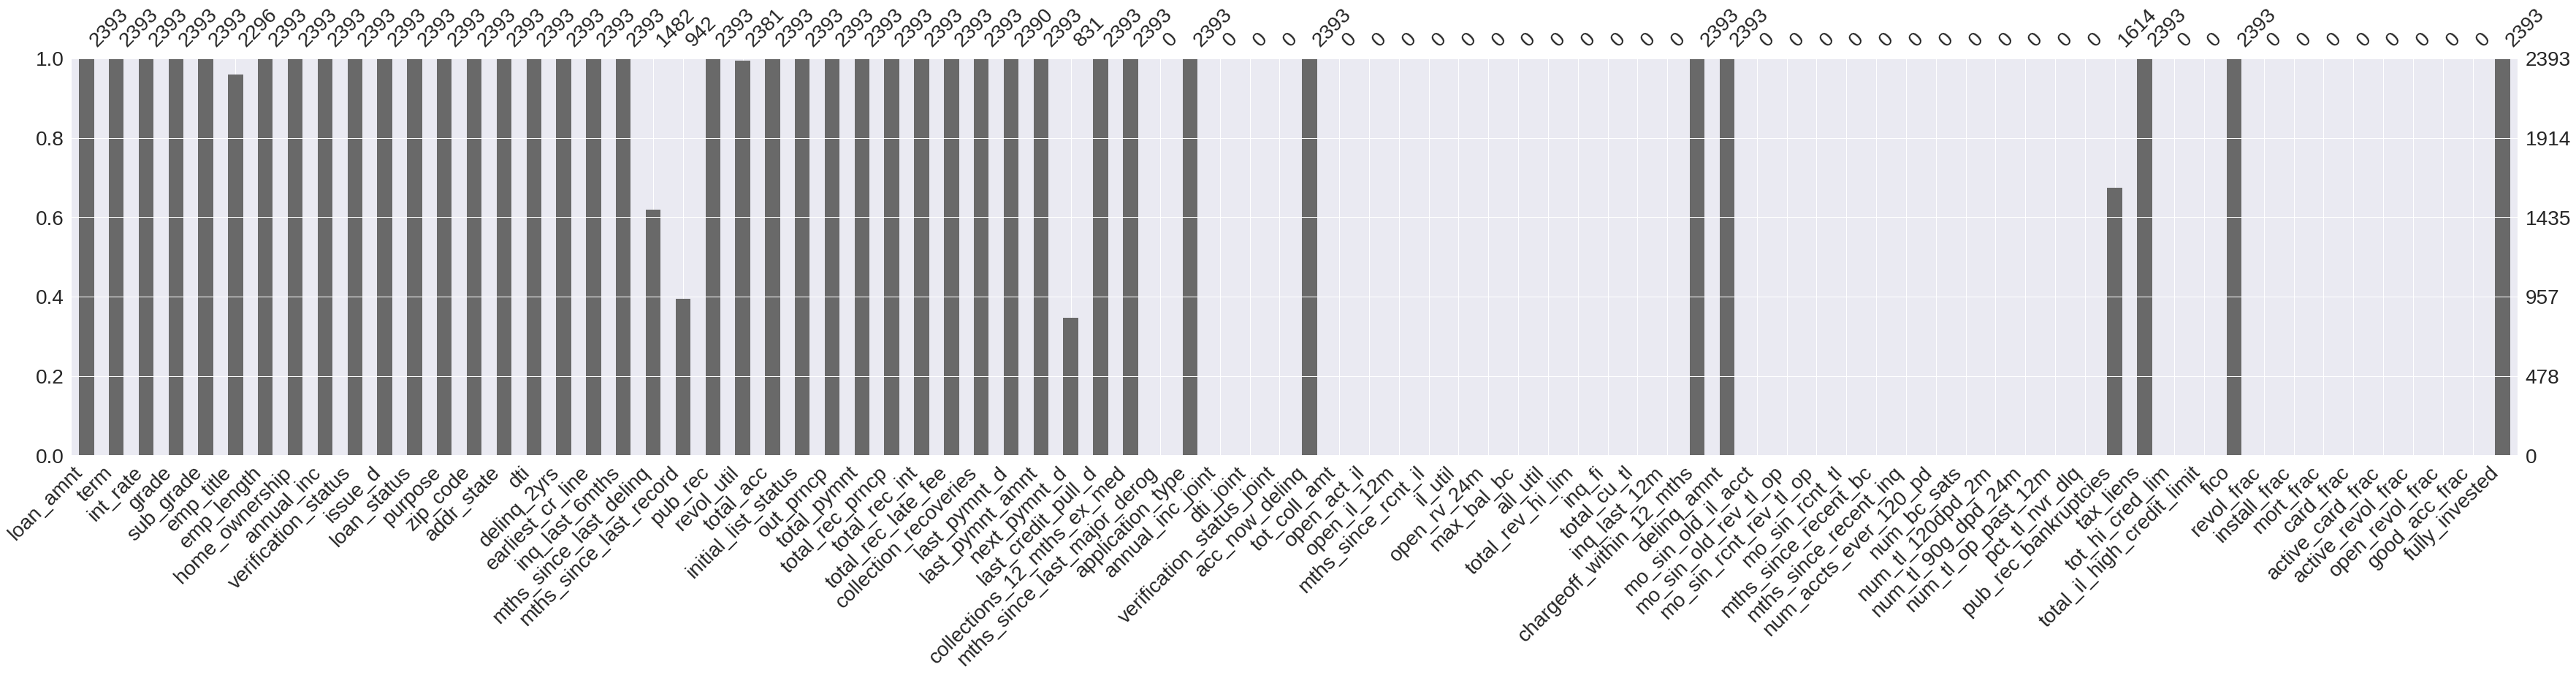

In [13]:
msno.bar(df_2008,figsize=(60, 10),fontsize=28,labels=True)

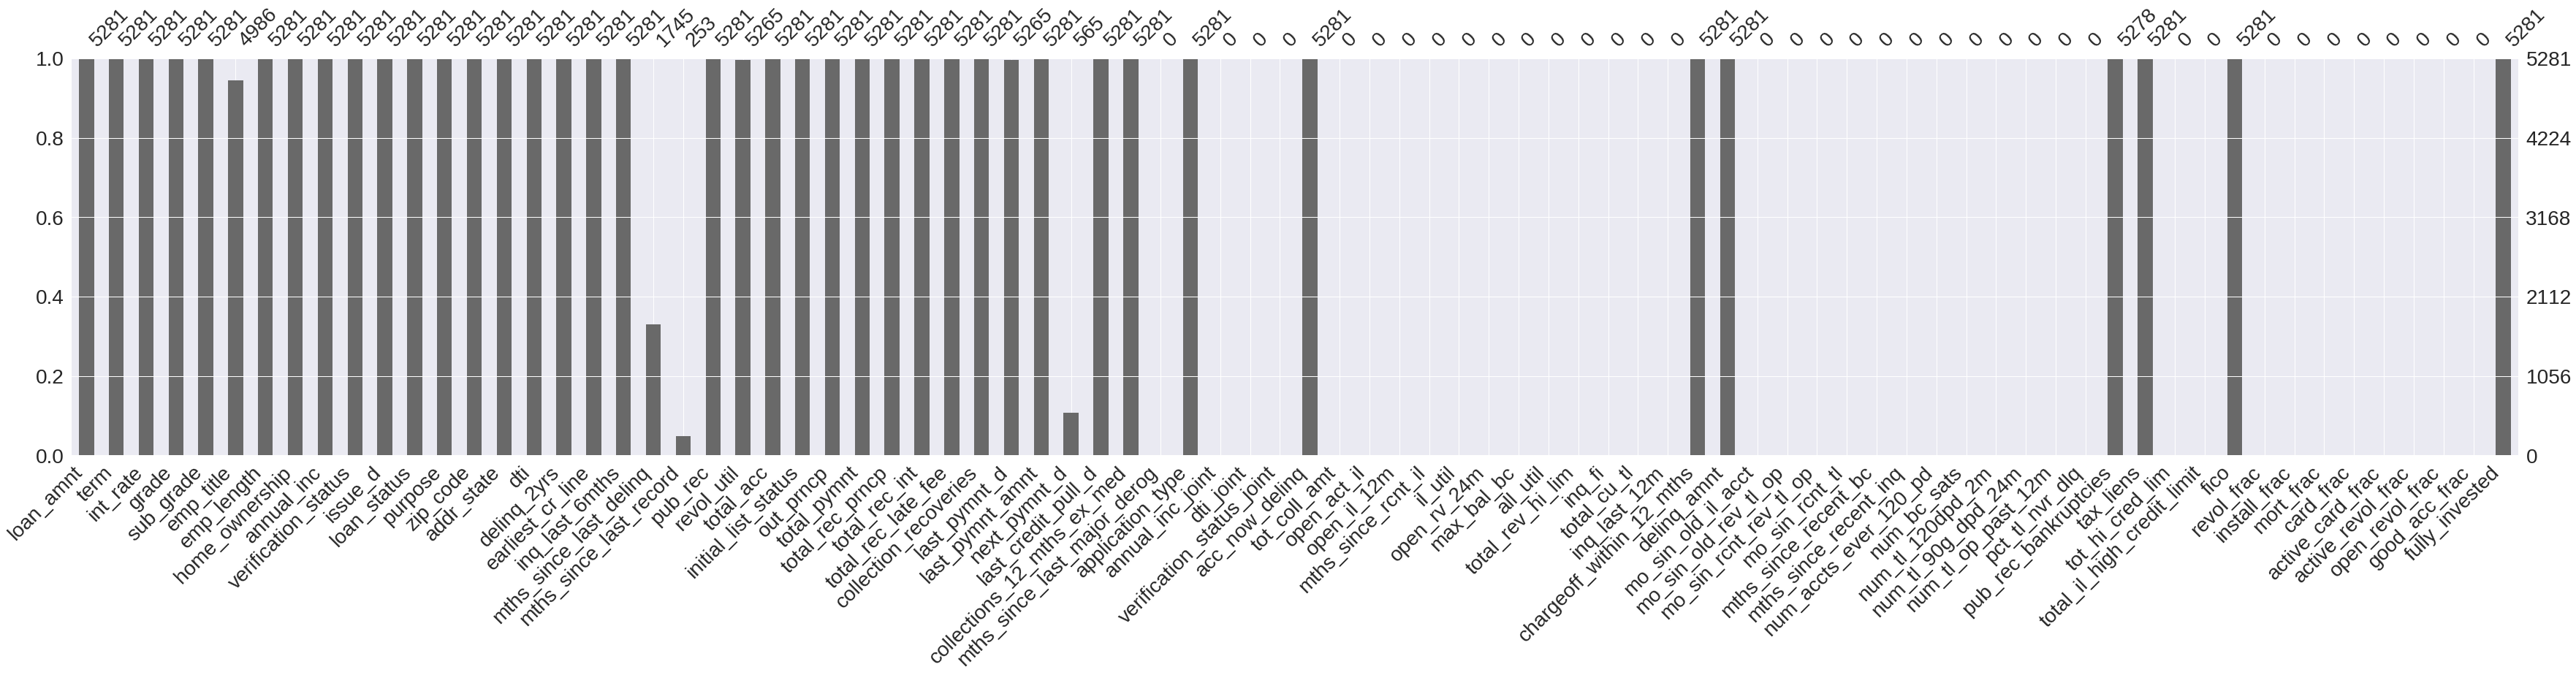

In [14]:
msno.bar(df_2009,figsize=(60, 10),fontsize=28,labels=True)

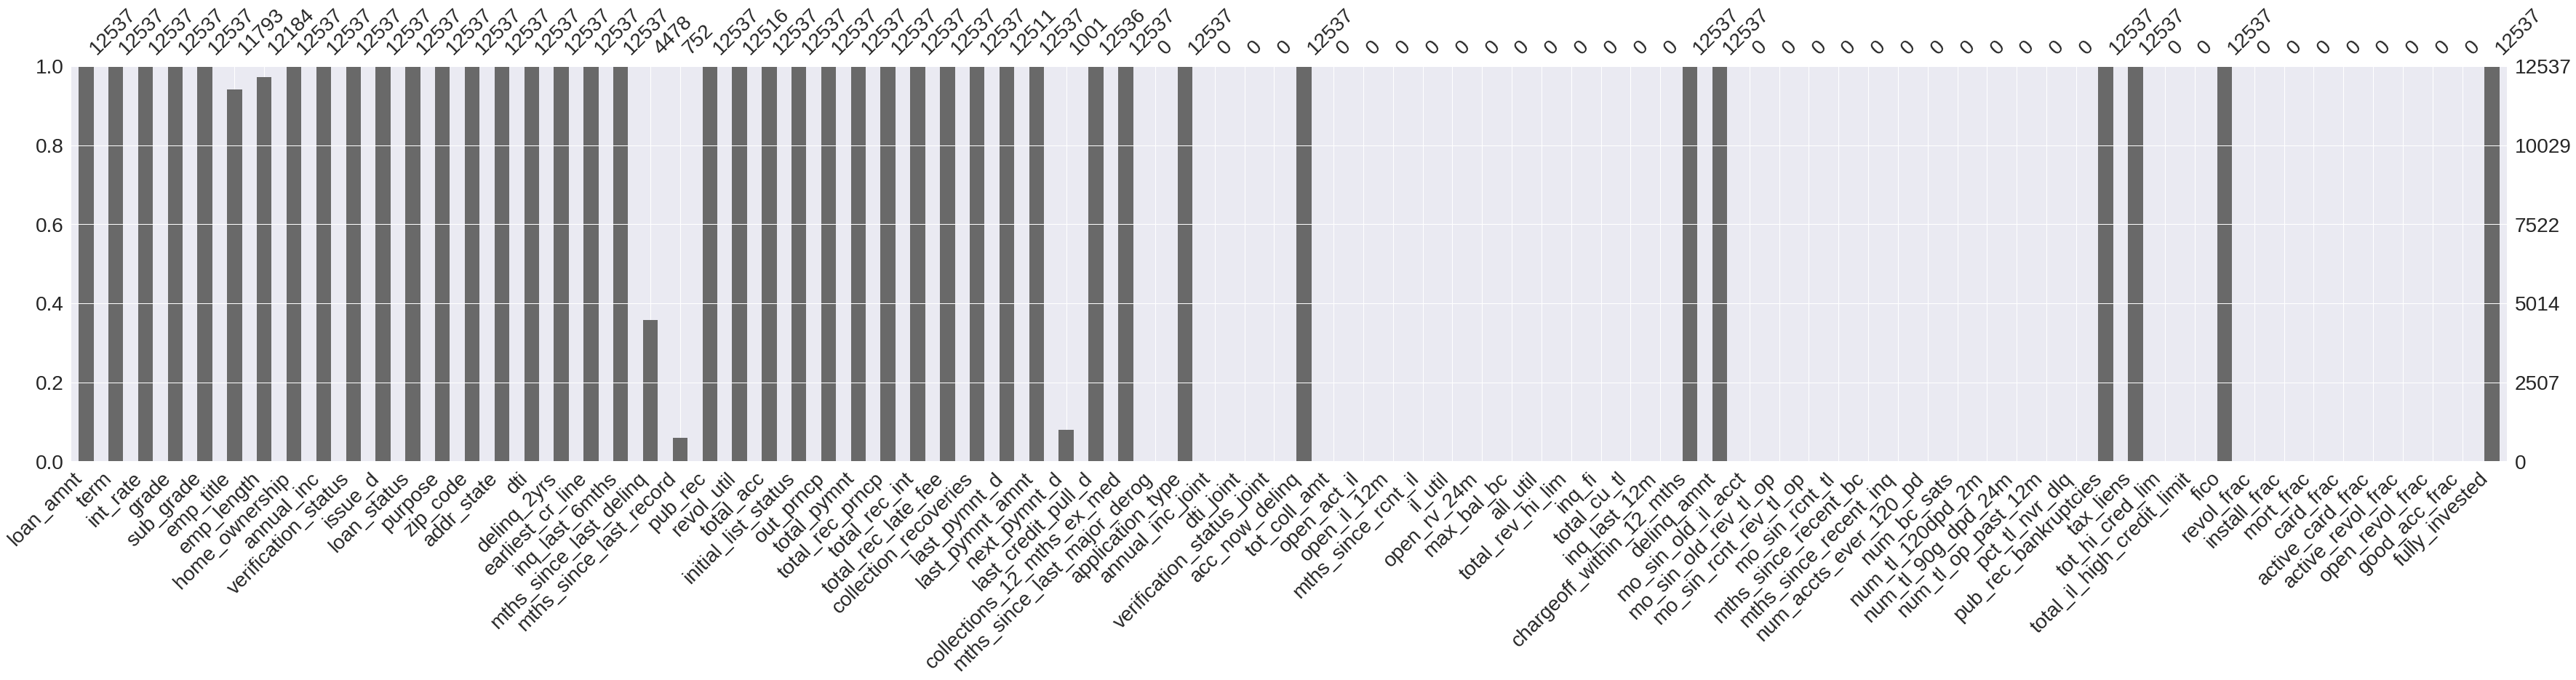

In [15]:
msno.bar(df_2010,figsize=(60, 10),fontsize=28,labels=True)

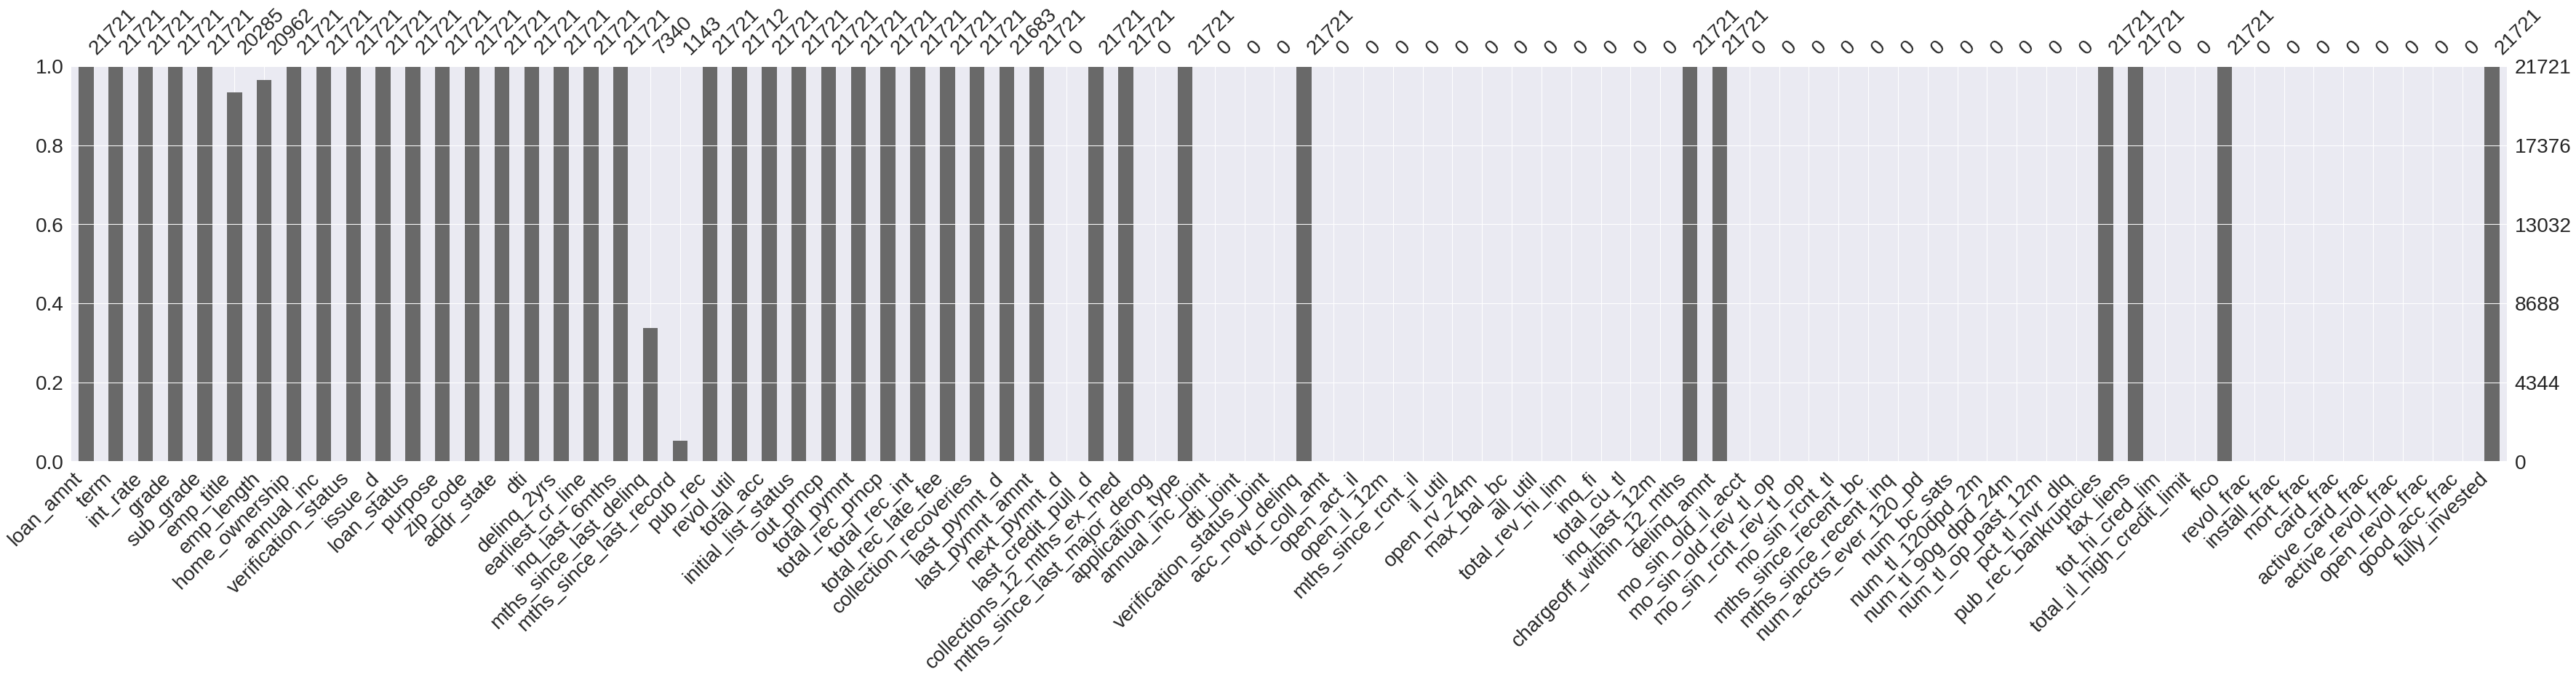

In [16]:
msno.bar(df_2011,figsize=(60, 10),fontsize=28,labels=True)

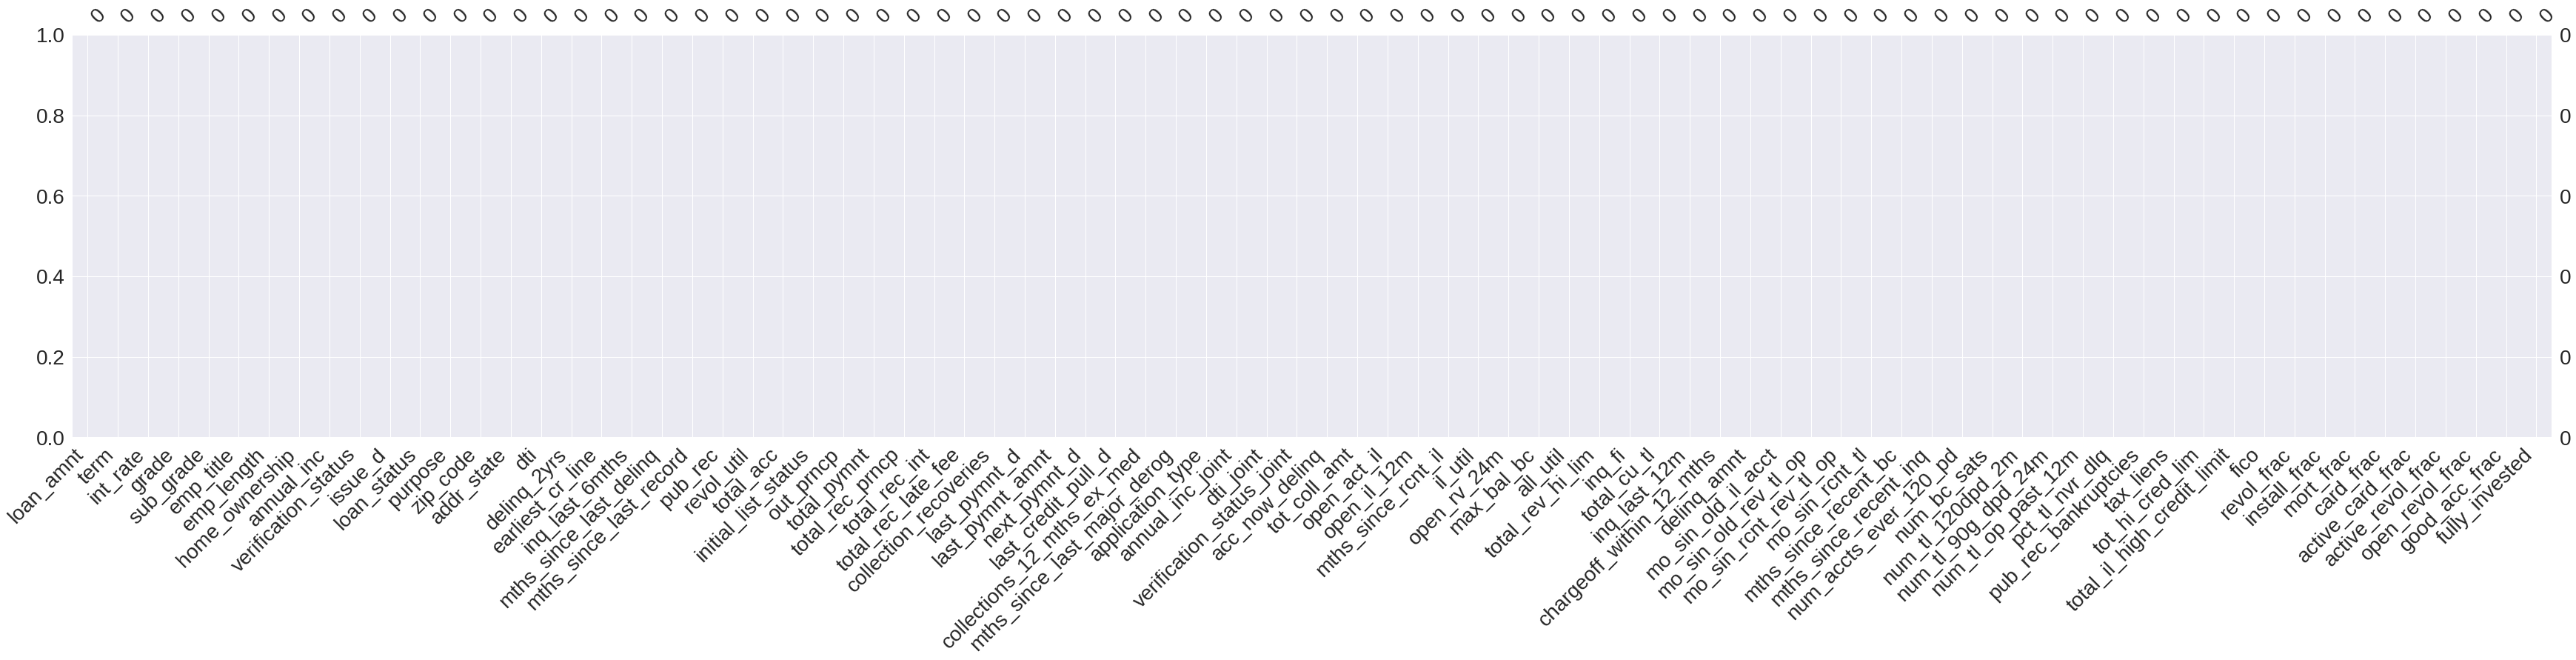

In [17]:
msno.bar(df_2012,figsize=(60, 10),fontsize=28,labels=True)

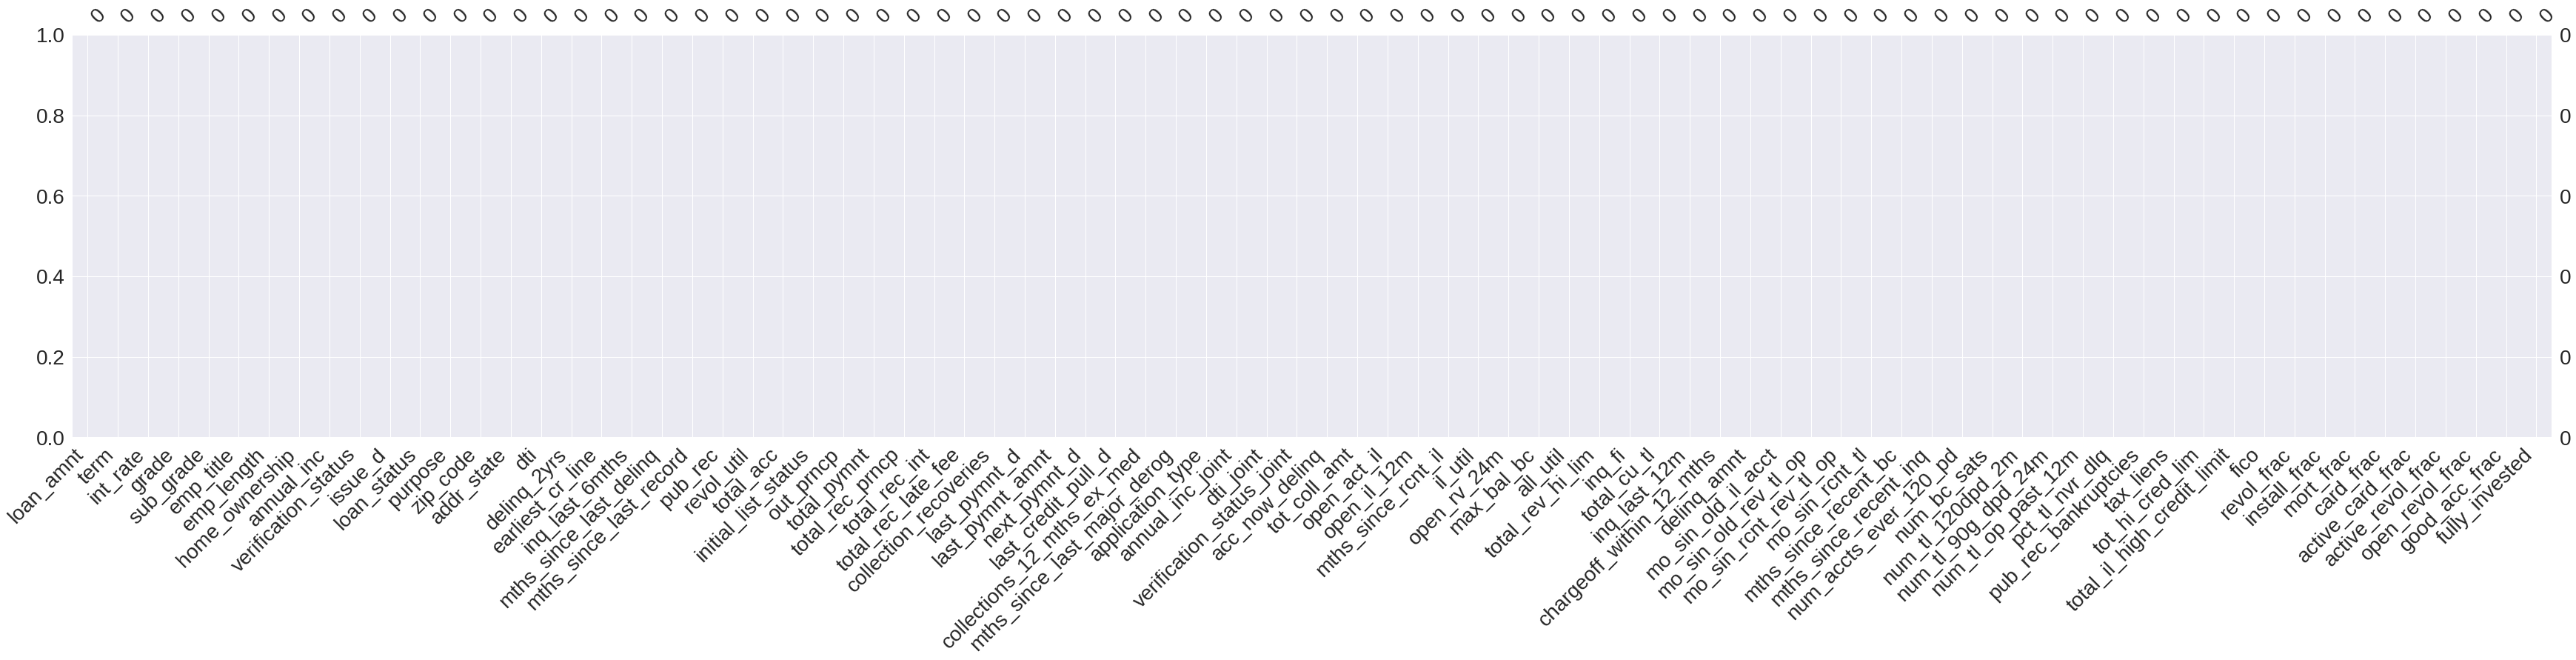

In [18]:
msno.bar(df_2013,figsize=(60, 10),fontsize=28,labels=True)

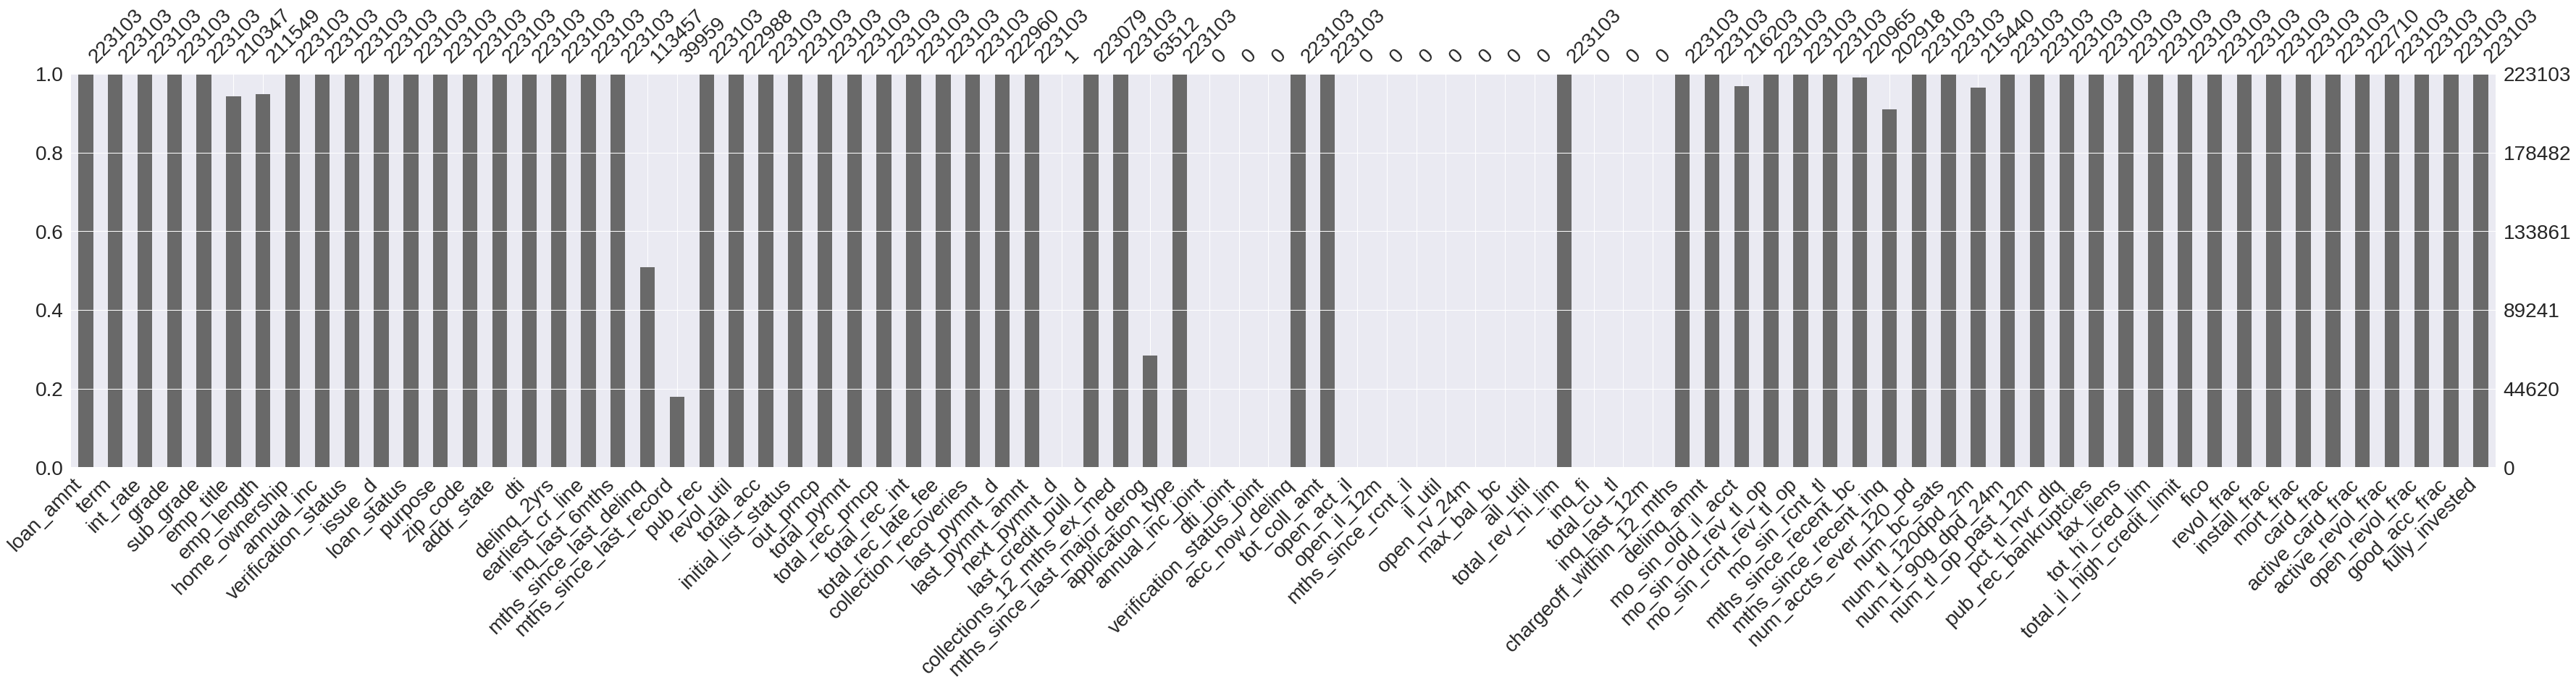

In [19]:
msno.bar(df_2014,figsize=(60, 10),fontsize=28,labels=True)

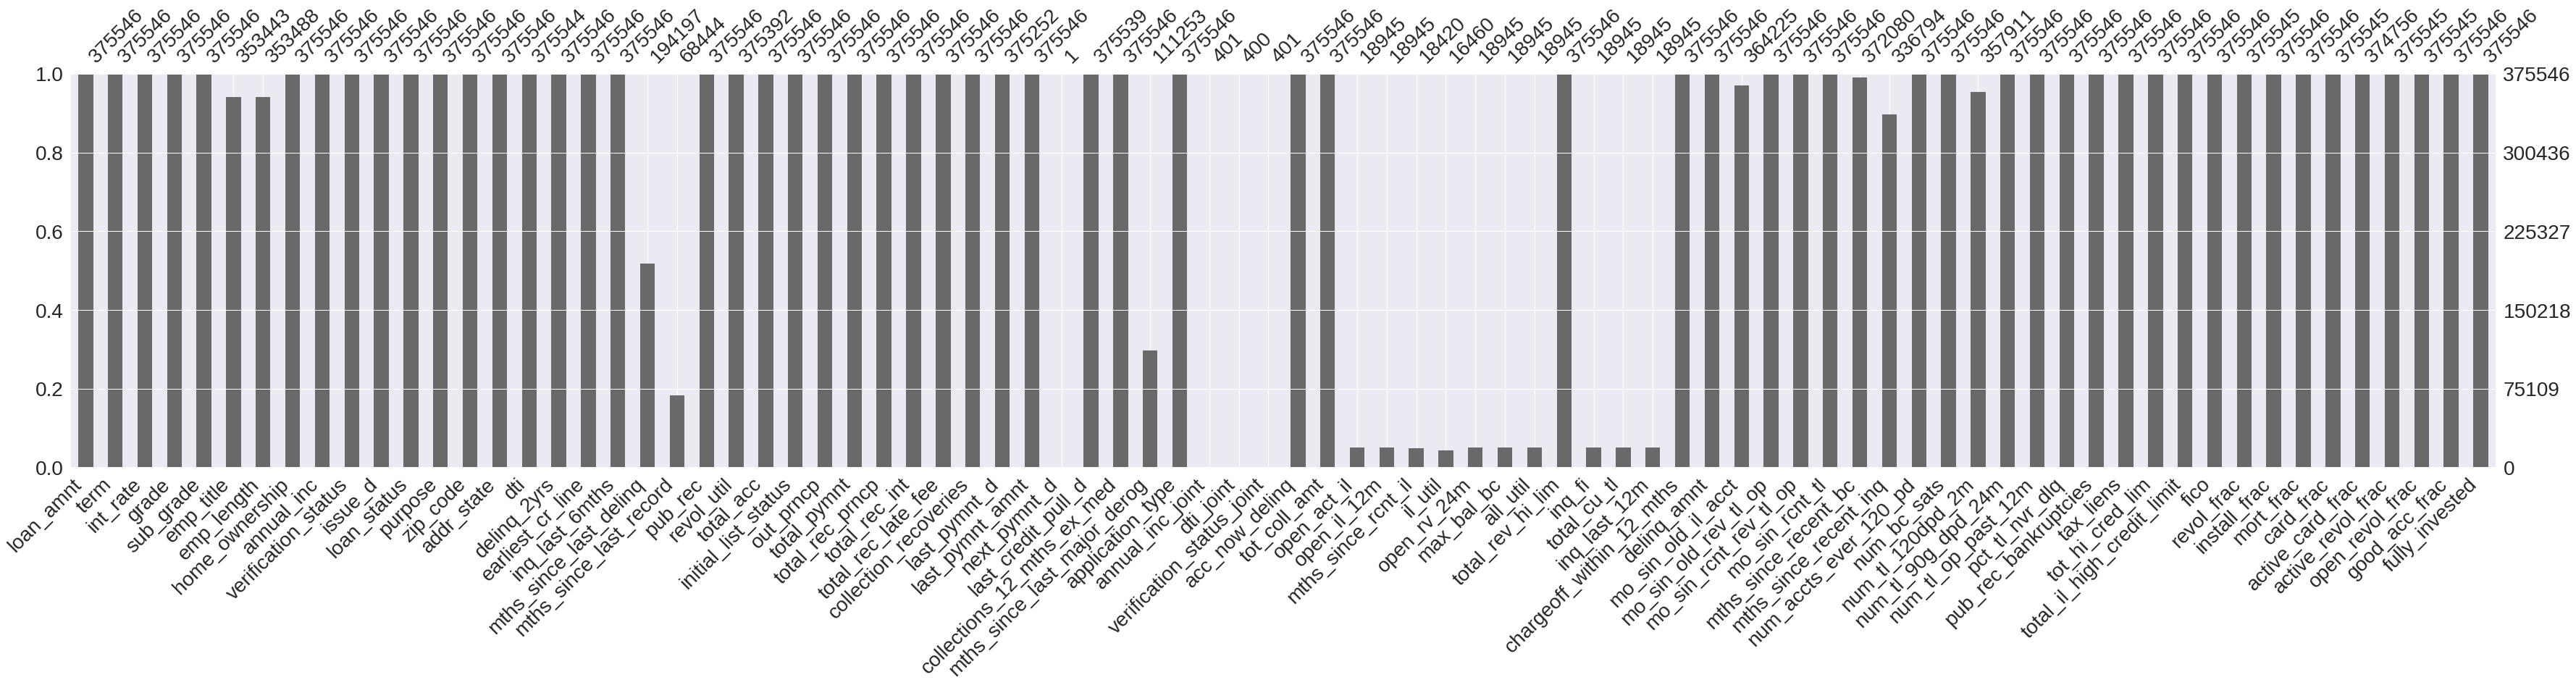

In [22]:
msno.bar(df_2015,figsize=(60, 10),fontsize=28,labels=True)

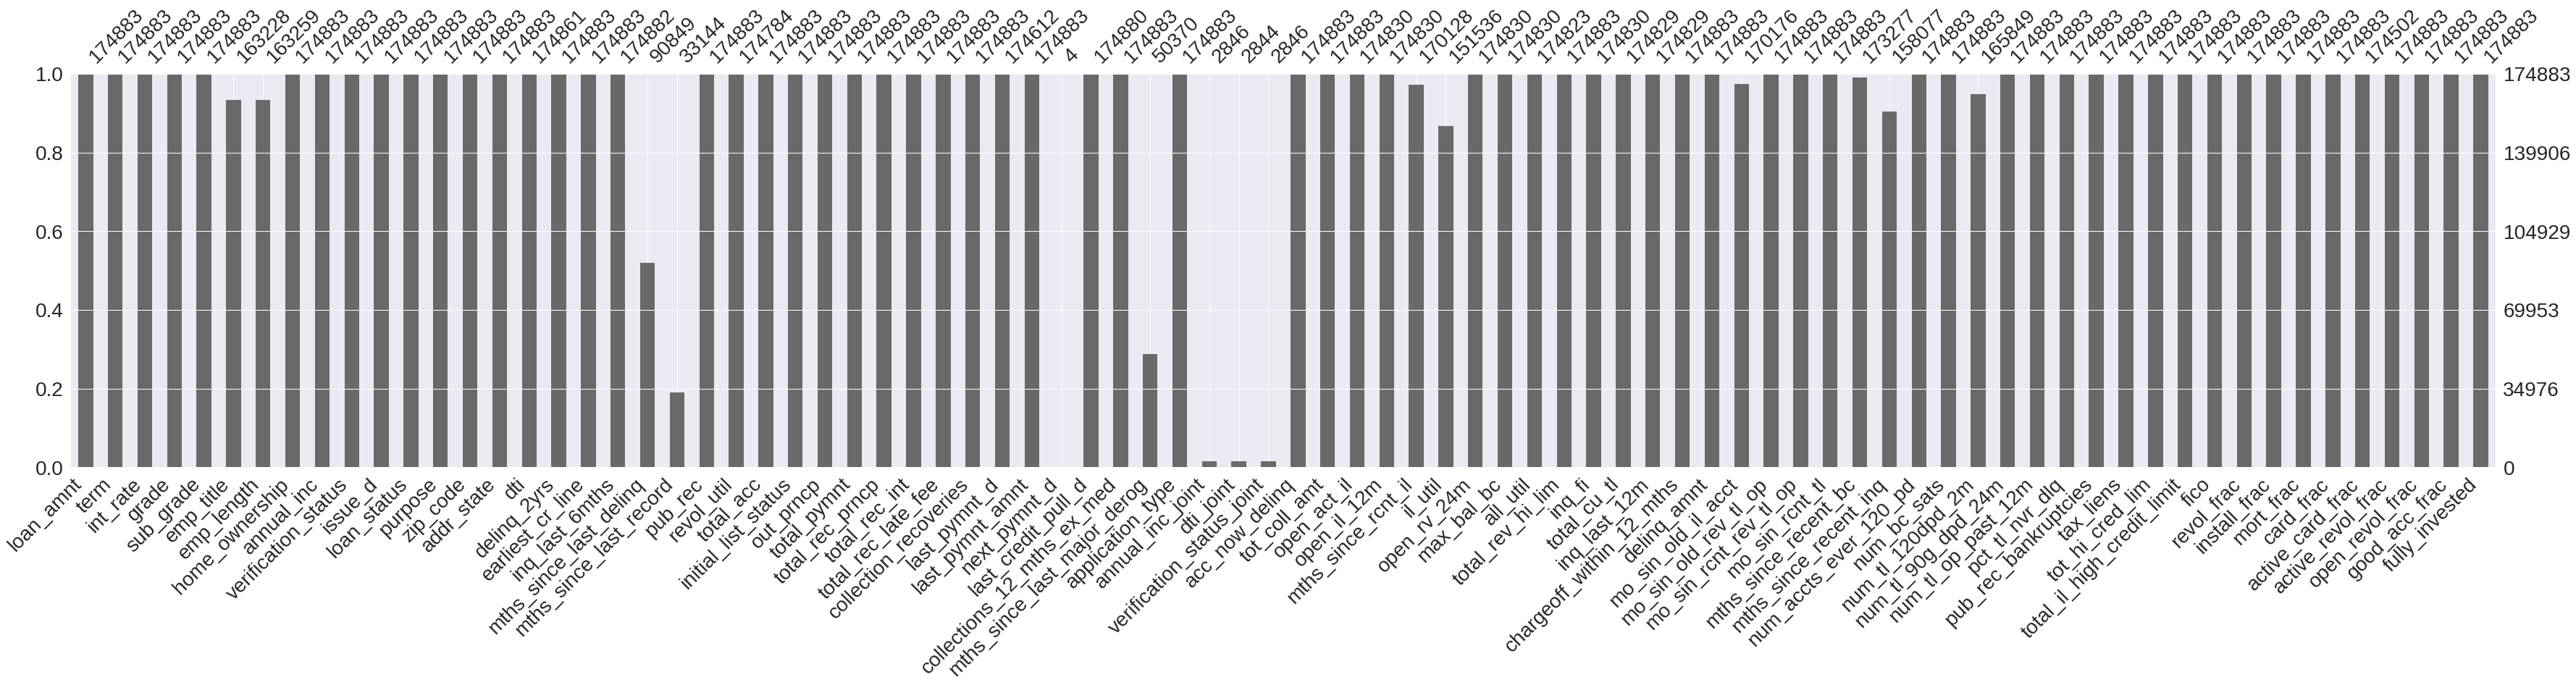

In [23]:
msno.bar(df_2016,figsize=(60, 10),fontsize=28,labels=True)

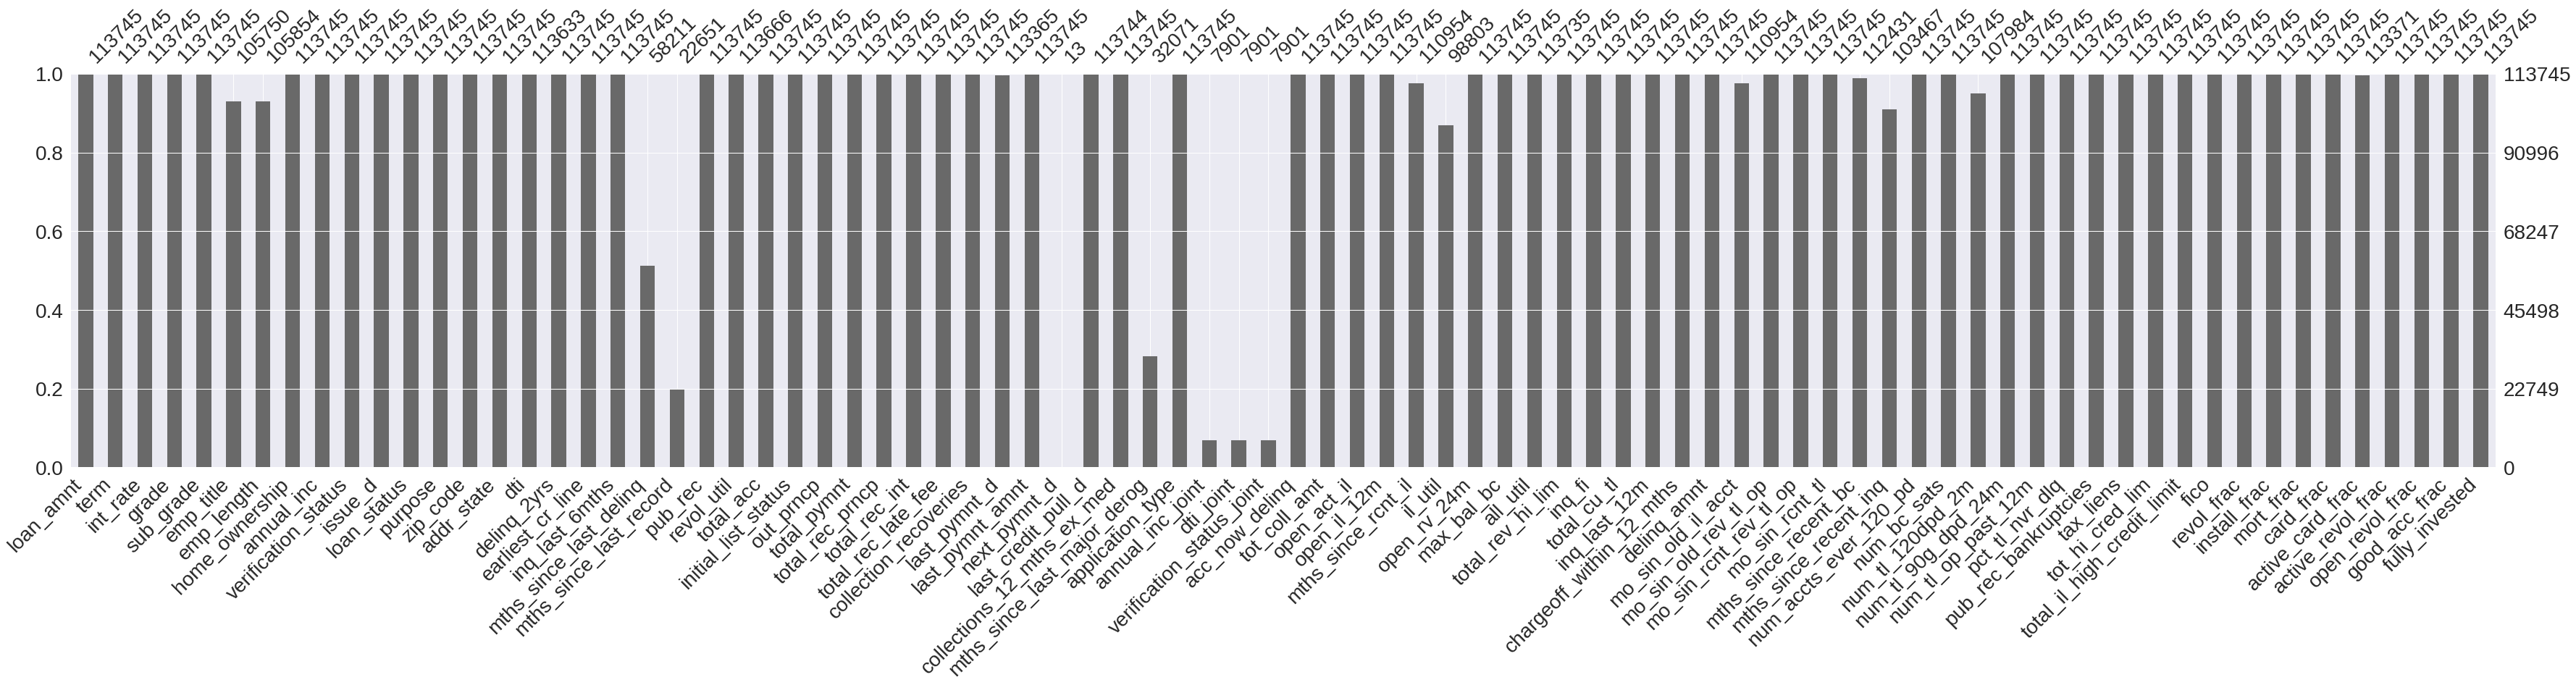

In [24]:
msno.bar(df_2017,figsize=(60, 10),fontsize=28,labels=True)

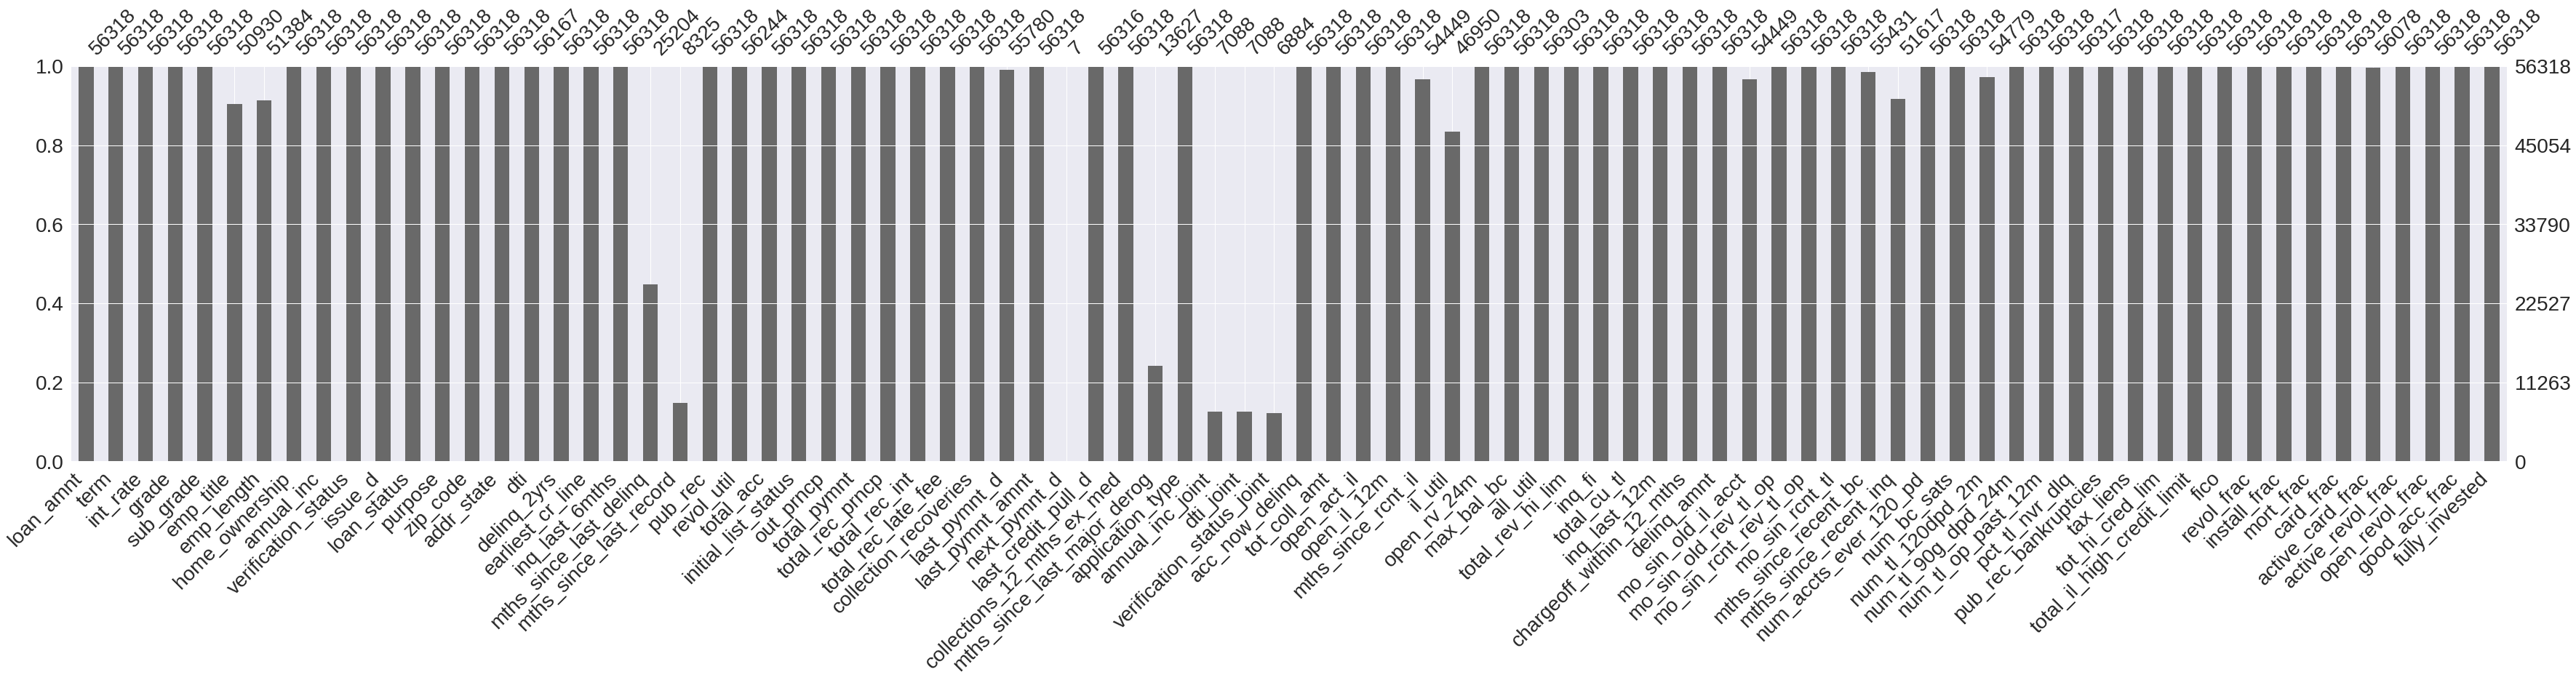

In [25]:
msno.bar(df_2018,figsize=(60, 10),fontsize=28,labels=True)

# Overall Summary of Missingness

In [ ]:
# pandas_profiling.ProfileReport(df_0)